# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Roberto Emiliano Morales Nieto

- ID: A01642426

- My carreer: Ingeniería en Tecnologias Computacionales


# Importing libraries

In [494]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans


# PART 1
# Use your assigned dataset

## A1 Load data

In [495]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/A01642426/"

else:
    # Define path del proyecto
    Ruta            = ""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [496]:
# Dataset url
url = Ruta + "A01642426_aux_X.csv"

# Load the dataset
df  = pd.read_csv(url)

df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


## A2 Data managment


Print the first 7 rows

In [497]:
df.head(7)

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
5,-4.329265,-12.703261,3.241493,5.039199,-12.451532,1.510952
6,0.260552,-3.833348,1.368336,4.821189,-3.928958,1.565081


Print the last 4 rows

In [498]:
df.tail(4)

,x1,x2,x3,x4,x5,x6
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975
1023,2.616634,0.274593,-5.521864,9.582110,0.878266,-8.274990


How many rows and columns are in your data?

Use the `shape` method


In [499]:
print('El dataset tiene',df.shape[1],'columnas y', df.shape[0],'filas')

El dataset tiene 6 columnas y 1024 filas


Print the name of all columns

Use the `columns` method

In [500]:
print(df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')


What is the data type in each column

Use the `dtypes` method

In [501]:
print(df.dtypes)


x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
dtype: object


What is the meaning of rows and columns?

In [502]:
# Your responses here

# 1)

# 2)

# 3)

#...





Print a statistical summary of your columns


In [503]:
print(df.describe())

                x1           x2           x3           x4           x5  \
count  1024.000000  1024.000000  1024.000000  1024.000000  1024.000000   
mean     -1.306552    -0.813203     2.723793     5.034164    -0.750993   
std       5.078200     6.961691     5.749202     2.488843     6.681293   
min     -13.103651   -15.006876   -10.997864    -3.320707   -14.659036   
25%      -4.968442    -6.039456    -1.972076     3.370508    -5.716128   
50%      -0.703749    -1.386716     4.105811     4.957425    -0.750850   
75%       2.314061     3.803313     7.603972     6.627528     4.694809   
max      10.595493    15.136358    13.951990    13.237068    13.636751   

                x6  
count  1024.000000  
mean     -1.503553  
std       5.037398  
min     -13.428455  
25%      -5.987090  
50%      -0.913367  
75%       3.031108  
max       9.805784  


In [504]:
# 1) What is the minumum and maximum values of each variable
#    x1 min = -13.103651          x1 max = 10.595493
#    x2 min = -15.006876          x2 max = 15.136358
#.   x3 min = -10.997864          x3 max = 13.951990
#    x4 min = -3.320707           x4 max =  13.237068
#    x5 min = -14.659036          x5 max = 13.636751
#    x6 min = -13.428455          x6 max = 9.805784

# 2) What is the mean and standar deviation of each variable
#    x1 mean = -1.306552           x1 std dev = 5.078200
#    x2 mean = -0.813203           x2 std dev = 6.961691
#    x3 mean = 2.723793            x3 std dev = 5.749202
#    x4 mean = 5.034164            x4 std dev = 2.488843
#    x5 mean = -0.750993           x5 std dev = 6.681293
#    x6 mean = -1.503553           x6 std dev = 5.037398



# 3) What the 25%, 50% and 75% represent?
#Los porcentajes representas los cuartiles a los que los datos están el rangos
# el 25% representa que los datos debajo de ese valor son el primer cuartil
# el 50% representa que los datos debajo de ese valor son el segundo cuartil
# el 75% representa que los datos debajo de ese valor son el tercer cuartil


Rename the columns using the same name with capital letters

In [505]:
df.rename(columns={'x1': 'X1', 'x2': 'X2', 'x3': 'X3','x4': 'X4','x5': 'X5','x6': 'X6'})
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


Rename the columns to their original names

In [506]:
df.rename(columns={'X1': 'x1', 'X2': 'x2', 'X3': 'x3','X4': 'x4','X5': 'x5','X6': 'x6'})
df


,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


Use two different alternatives to get one of the columns

In [507]:
df.iloc[:, 0]

0       1.914825
1       1.356415
2       1.185186
3      -1.739155
4       7.890985
          ...   
1019    3.685106
1020   -7.014173
1021   -2.993762
1022    4.576644
1023    2.616634
Name: x1, Length: 1024, dtype: float64

In [508]:
df.loc[:, 'x1']

0       1.914825
1       1.356415
2       1.185186
3      -1.739155
4       7.890985
          ...   
1019    3.685106
1020   -7.014173
1021   -2.993762
1022    4.576644
1023    2.616634
Name: x1, Length: 1024, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72





In [509]:
filaSlice = slice(62, 73)
columnaSlice = slice(1, 3)

segmento = df.iloc[filaSlice, columnaSlice]

print(segmento)

           x2        x3
62  -6.605730  1.941772
63 -10.369955  8.422069
64  -0.691834 -8.553652
65   7.646763  8.353849
66 -12.022063  6.534650
67   9.113604  8.878609
68   8.709012  9.370871
69  13.435256  7.936103
70 -11.447194  9.303101
71  -2.971484  1.192913
72  -9.803903  9.847883


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows





In [510]:
nullValores = df.iloc[:, 1:3].isnull().sum()
notNullValores = df.iloc[:, 1:3].notnull().sum()

print("Número de valores nulos por columna:", nullValores)
print("Número de valores no nulos por columna:", notNullValores)

# Verificar la suma de valores nulos y no nulos en el total de filas
filasTotales = df.shape[0]
checkX2 = nullValores['x2'] + notNullValores['x2'] == filasTotales
checkx3 = nullValores['x3'] + notNullValores['x3'] == filasTotales

print(f"Para 'x2', la suma de valores nulos y no nulos es igual al total de filas: {checkX2}")
print(f"Para 'x3', la suma de valores nulos y no nulos es igual al total de filas: {checkx3}")


Número de valores nulos por columna: x2    0
x3    0
dtype: int64
Número de valores no nulos por columna: x2    1024
x3    1024
dtype: int64
Para 'x2', la suma de valores nulos y no nulos es igual al total de filas: True
Para 'x3', la suma de valores nulos y no nulos es igual al total de filas: True


Discard the last column


In [511]:
 df.drop(columns='x6',inplace=True)
 df

,x1,x2,x3,x4,x5
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681
1,1.356415,9.767893,7.263659,8.750819,5.568930
2,1.185186,11.528344,9.999419,7.890027,7.308210
3,-1.739155,12.648965,7.965588,7.850296,10.235743
4,7.890985,-3.210880,-7.672016,2.438106,3.310904
...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245
1021,-2.993762,7.528182,7.877165,8.895835,9.318544
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980


### Questions

Based on the previos results, provide a description of yout dataset

Your response: El dataset consta de 1024 filas de datos en 6 columnas, estos datos tienen un rango de negativos (-15) a positivos (15), con diversos decimales entre ellos lo cual proporciona precisión, estos datos crean un conjunto muy asequible para analisis de clustering y manipulación sencilla de ellos para descripciones y gráficas




## A3 Data visualization

Plot in the same figure the histogram of two variables






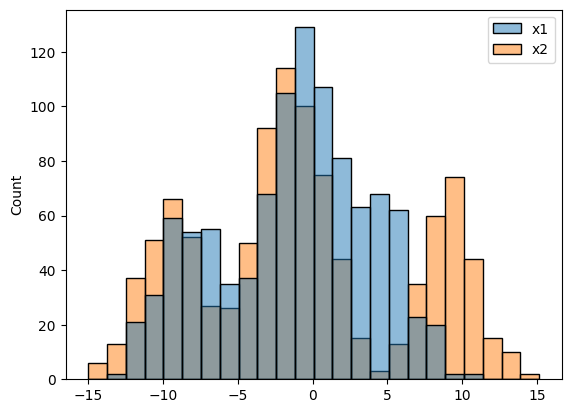

In [512]:
df2plot=df[["x1", "x2"]]
sns.histplot(df2plot,kde=False)

plt.show()

Based on these plots, provide a description of your data:

Your response here: En el histo grama se puede ver que los valores más frecuentes en los dos casos son de -5 a 5 aunque x2 tiene un rango de valores más amplio

Plot in the same figure the boxplot of two variables

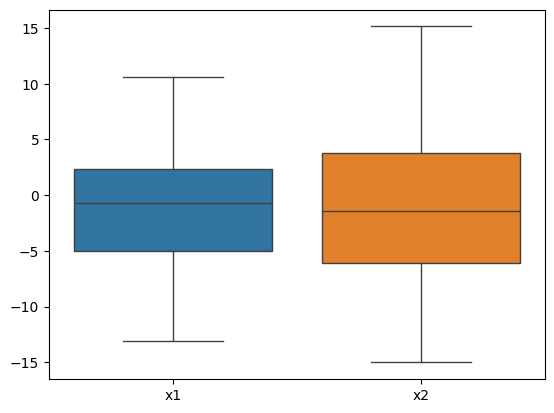

In [513]:
sns.boxplot(df2plot)

plt.show()

Plot the scatter plot of two variables

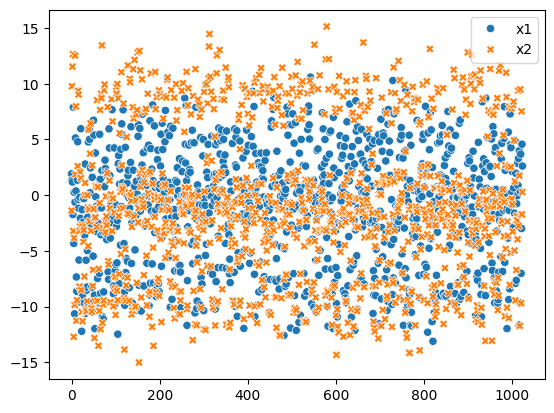

In [514]:
sns.scatterplot(df2plot)
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response: Se ve que la variable de x2 tiene un rango mayor de valores, mientras que x4 tiene valores más frecuentes entre 0 y 15




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [515]:
K  = 3
km = KMeans(n_clusters=K, n_init="auto")
yestimated = km.fit_predict(df[['x1','x2']] )


Add to your dataset a column with the estimated cluster to each data point

In [516]:
df['yestimated'] = yestimated
df.yestimated.unique()


array([1, 2, 0], dtype=int32)

Print the number associated to each cluster

In [517]:
df

,x1,x2,x3,x4,x5,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,1
1,1.356415,9.767893,7.263659,8.750819,5.568930,2
2,1.185186,11.528344,9.999419,7.890027,7.308210,2
3,-1.739155,12.648965,7.965588,7.850296,10.235743,2
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,1
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,1
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,0
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,2
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,1


Print the centroids

In [518]:
km.cluster_centers_

array([[-8.2676485 , -9.49378859],
       [ 1.91758088, -1.29113273],
       [-0.44487598,  9.15241204]])

Print the intertia metric

In [519]:
km.inertia_

12282.82057680785

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

In [520]:
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 264
Number of points in clusters 1: 505
Number of points in clusters 02: 255
Total Number of points in the clusters: 1024


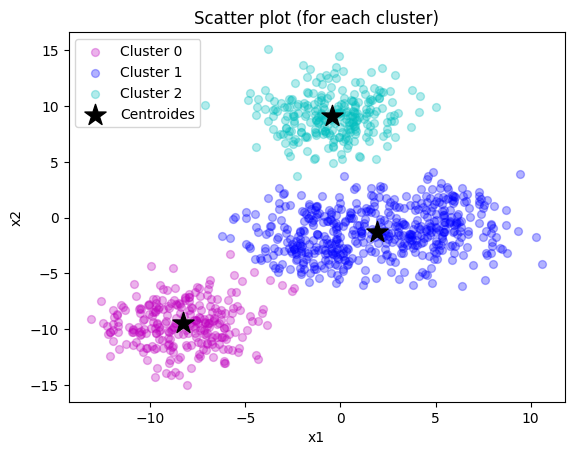

In [521]:
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='m', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='c', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response: Aquí podemos ver como se acumulan los datos en 3 clusters principales, unos tienen valores bajos como el cluster 3, el cluster 2 tiene valores más altos y el cluster 1 tiene valores cercanos al 0

## A5 Elbow plot

Compute the Elbow plot

In [522]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit_predict(df[['x1','x2']])
    sse.append(km.inertia_)


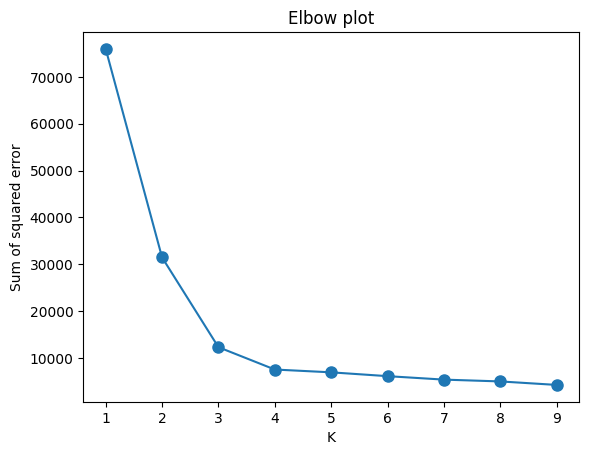

In [523]:

plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: El mejor numero de cluster serían entre 3 y 4 ya que el error cuadrado baja bastante en esa K, es mucho menor que haciendo 2 clusters


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)


Your response: En un principio sí era el numero de clusters que elegí ya que eran valores pequeños por lo que unos iban a ser negativos, otros positivos y unos cerca de 0




# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Se utilizaron estadísticas avanzadas y diversas técnicas para analizar un conjunto de datos de manera eficiente y sobre todo, dea acuerdo a la tecnología de hoy en día, indica un modelo preparado para los avances en el futuro y la comprensión de modelos complejos de analisis de datos.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Exhibe habilidad en seleccionar y utilizar las herramientas adecuadas para establecer relaciones entre dos variables, fundamentando sus decisiones en la teoría y en la evidencia de los datos. Es capaz de interpretar los resultados del modelo de manera coherente, identificando cómo estas relaciones contribuyen al entendimiento del fenómeno estudiado.